## 1-Generación aumentada de datos - Stack con normalización de valor máximo y filtro de fondo

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ruta general
base_dir = 'Coleccion/'

#Sub rutas Modelos
m1 = base_dir + 'Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Imagenes/'
m2 = base_dir + 'Anillo_compresion__Carga_Lineal_3200N__100_frames__256_Resolucion/Imagenes/'
m3 = base_dir + 'Placa_Infinita__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/'
m4 = base_dir + 'Viga_distribuida__Carga_Lineal_3000N__100_frames__256_Resolucion/Imagenes/'
m5 = base_dir + 'Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/Imagenes/'
#m6 = base_dir + 'Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/'
#m7 = base_dir + 'Mensula__Carga_Lineal_100000N__100_frames__256_Resolucion/Imagenes/'

""""
# Sub Rutas iluminacion + camara
c = ['Concord_DCC3260C_No_correccion/',
 'Concord_exo304CU3_No_correccion/',
 'Concord_IMX250MYR_No_correccion/',
 'Concord_IMX250MZR_No_correccion/',
 'Concord_IMX253MZR_No_correccion/',
 'Concord_Ojo_Humano_No_correccion/',
 'Concord_PL_D755CU_No_correccion/',
 'DL11_DCC3260C_No_correccion/',
 'DL11_exo304CU3_No_correccion/',
 'DL11_IMX250MYR_No_correccion/',
 'DL11_IMX250MZR_No_correccion/',
 'DL11_IMX253MZR_No_correccion/',
 'DL11_Ojo_Humano_No_correccion/',
 'DL11_PL_D755CU_No_correccion/',
 'Fluorescente_DCC3260C_No_correccion/',
 'Fluorescente_exo304CU3_No_correccion/',
 'Fluorescente_IMX250MYR_No_correccion/',
 'Fluorescente_IMX250MZR_No_correccion/',
 'Fluorescente_IMX253MZR_No_correccion/',
 'Fluorescente_Ojo_Humano_No_correccion/',
 'Fluorescente_PL_D755CU_No_correccion/',
 'LCD_DCC3260C_No_correccion/',
 'LCD_exo304CU3_No_correccion/',
 'LCD_IMX250MYR_No_correccion/',
 'LCD_IMX250MZR_No_correccion/',
 'LCD_IMX253MZR_No_correccion/',
 'LCD_Ojo_Humano_No_correccion/',
 'LCD_PL_D755CU_No_correccion/',
 'Philips_DCC3260C_No_correccion/',
 'Philips_exo304CU3_No_correccion/',
 'Philips_IMX250MYR_No_correccion/',
 'Philips_IMX250MZR_No_correccion/',
 'Philips_IMX253MZR_No_correccion/',
 'Philips_Ojo_Humano_No_correccion/',
 'Philips_PL_D755CU_No_correccion/',
 'RXD2_DCC3260C_No_correccion/',
 'RXD2_exo304CU3_No_correccion/',
 'RXD2_IMX250MYR_No_correccion/',
 'RXD2_IMX250MZR_No_correccion/',
 'RXD2_IMX253MZR_No_correccion/',
 'RXD2_Ojo_Humano_No_correccion/',
 'RXD2_PL_D755CU_No_correccion/',
 'Sylvania_DCC3260C_No_correccion/',
 'Sylvania_exo304CU3_No_correccion/',
 'Sylvania_IMX250MYR_No_correccion/',
 'Sylvania_IMX250MZR_No_correccion/',
 'Sylvania_IMX253MZR_No_correccion/',
 'Sylvania_Ojo_Humano_No_correccion/',
 'Sylvania_PL_D755CU_No_correccion/',
 'Toshiba_DCC3260C_No_correccion/',
 'Toshiba_exo304CU3_No_correccion/',
 'Toshiba_IMX250MYR_No_correccion/',
 'Toshiba_IMX250MZR_No_correccion/',
 'Toshiba_IMX253MZR_No_correccion/',
 'Toshiba_Ojo_Humano_No_correccion/',
 'Toshiba_PL_D755CU_No_correccion/',
 'Willard_DCC3260C_No_correccion/',
 'Willard_exo304CU3_No_correccion/',
 'Willard_IMX250MYR_No_correccion/',
 'Willard_IMX250MZR_No_correccion/',
 'Willard_IMX253MZR_No_correccion/',
 'Willard_Ojo_Humano_No_correccion/',
 'Willard_PL_D755CU_No_correccion/']

"""

c = ['Philips_IMX250MYR_No_correccion/',
    'Concord_IMX250MYR_No_correccion/']

# Sub Rutas imagenes originales
i1 = 'Img_1/'
i2 = 'Img_2/'
i3 = 'Img_3/'
i4 = 'Img_4/'

mm = [m1, m2, m3, m4, m5]
#mm = [m6, m7]
ii = [i1, i2, i3, i4]

In [2]:
# Ruta general
base_dir = 'Coleccion/'

#Sub rutas Modelos
m1 = base_dir + 'Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/'
m2 = base_dir + 'Anillo_compresion__Carga_Lineal_3200N__100_frames__256_Resolucion/'
m3 = base_dir + 'Placa_Infinita__Carga_Lineal_7000N__100_frames__256_Resolucion/'
m4 = base_dir + 'Viga_distribuida__Carga_Lineal_3000N__100_frames__256_Resolucion/'
m5 = base_dir + 'Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/'
#m6 = base_dir + 'Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/'
#m7 = base_dir + 'Mensula__Carga_Lineal_100000N__100_frames__256_Resolucion/'

ims = 'Imagenes/'

# Sub Rutas iluminacion + camara

c = ['Concord_IMX250MYR_No_correccion/',
 'Concord_IMX250MZR_No_correccion/',
 'DL11_IMX250MYR_No_correccion/',
 'DL11_IMX250MZR_No_correccion/',
 'Fluorescente_IMX250MYR_No_correccion/',
 'Fluorescente_IMX250MZR_No_correccion/',
 'LCD_IMX250MYR_No_correccion/',
 'LCD_IMX250MZR_No_correccion/',
 'Philips_IMX250MYR_No_correccion/',
 'Philips_IMX250MZR_No_correccion/',
 'RXD2_IMX250MYR_No_correccion/',
 'RXD2_IMX250MZR_No_correccion/',
 'Sylvania_IMX250MYR_No_correccion/',
 'Sylvania_IMX250MZR_No_correccion/',
 'Toshiba_IMX250MYR_No_correccion/',
 'Toshiba_IMX250MZR_No_correccion/',
 'Willard_IMX250MYR_No_correccion/',
 'Willard_IMX250MZR_No_correccion/']


cs = ['3', '4', '10', '11', '17', '18', '24', '25', '31', '32', '38', '39', '45', '46', '52', '53', '59', '60'] 

# Sub Rutas imagenes originales
i1 = 'Img_1/'
i2 = 'Img_2/'
i3 = 'Img_3/'
i4 = 'Img_4/'

# Almacenamiento de stacks
folder = 'FilteredStack1234/'

mm = [m1, m2, m3, m4, m5]
ii = [i1, i2, i3, i4]

In [140]:
# Crear carpetas para imágenes resultantes 1 stack
import os
folder = 'Stokes'
for m in mm:
    for n in c:
        path = os.path.join(m, ims, n, folder)
        os.mkdir(path)

In [203]:
folder = 'StokesHSI'
for m in mm:
    for n in c:
        path = os.path.join(m, ims, n, folder)
        os.rmdir(path)

OSError: [WinError 145] El directorio no está vacío: 'Coleccion/Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Imagenes/Concord_IMX250MYR_No_correccion/StokesHSI'

In [139]:
import os
import shutil

folder = 'Stokes'
for m in mm:
    for n in c:
        path = os.path.join(m, ims, n, folder)
        shutil.rmtree(path)

In [ ]:
# Cambio de nombre de archivos
import os
folder = 'Stokes'
for m in mm:
    for z in c:
        for n in range(1, 101):
            old_name = os.path.join(m, z, folder, 'Stokes_M' + str(mm.index(m)+1) + '_C' + str(cs[c.index(z)])  +  '_' + str(300+n) + '.npy')
            new_name = os.path.join(m, z, folder, 'Stokes_M' + str(mm.index(m)+1) + '_C' + str(c.index(z)+1)  +  '_' + str(300+n) + '.npy')
            os.rename(old_name, new_name)

# Disco

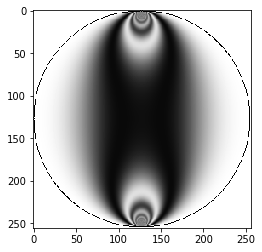

In [9]:
a1 = cv2.imread(m1 + ims + c[3] + 'Img_1/Img1_100.bmp')[:,:,1]
plt.imshow(a1, cmap='gray')

In [11]:
df = pd.DataFrame(a1)
# df.to_excel('a1.xlsx')

In [12]:
a1.shape

(256, 256)

In [13]:
a2 = a1.copy()

In [14]:
a2.sum()

10478734

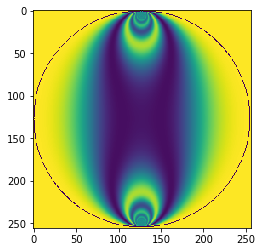

In [15]:
plt.imshow(a1)

In [16]:
for i in range(256):
    for j in range(256):
        if ((i-128)**2)+((j-128)**2) > (128)**2:
            a2[i,j] = 0

In [17]:
a2.sum()

6906439

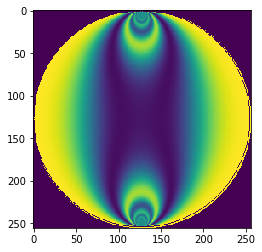

In [20]:
plt.imshow(a2)

In [3]:
def filtro_disco(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            if ((i-128)**2)+((j-128)**2) > (128)**2:
                a1[i,j] = 0    
    return a1

# Anillo

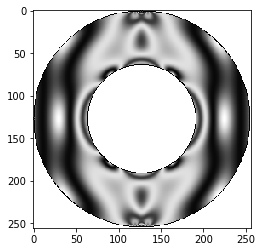

In [19]:
a3 = cv2.imread(m2 + ims + c[3] + 'Img_1/Img1_100.bmp')[:,:,1]
plt.imshow(a3, cmap='gray')

In [20]:
df2 = pd.DataFrame(a3)
#df2.to_excel('a3.xlsx')

In [21]:
a4 = a3.copy()

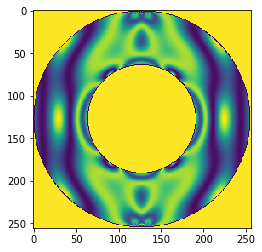

In [22]:
plt.imshow(a3)

In [23]:
for i in range(256):
    for j in range(256):
        value = ((i-128)**2)+((j-128)**2)
        if (value >= (126)**2) or (value < (64)**2):
            a4[i,j] = 0

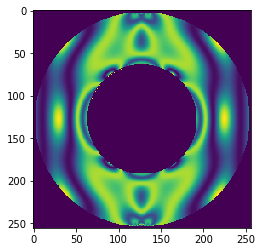

In [24]:
plt.imshow(a4)

In [4]:
def filtro_anillo(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            value = ((i-128)**2)+((j-128)**2)
            if (value >= (126)**2) or (value < (64)**2):
                a1[i,j] = 0   
    return a1

# Placa

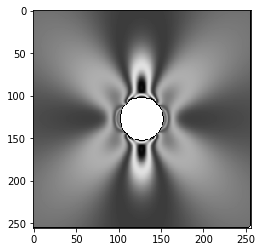

In [26]:
a5 = cv2.imread(m3 + ims + c[3] + 'Img_1/Img1_100.bmp')[:,:,1]
plt.imshow(a5, cmap='gray')

In [27]:
df3 = pd.DataFrame(a5)
#df3.to_excel('a5.xlsx')

In [28]:
a6 = a5.copy()

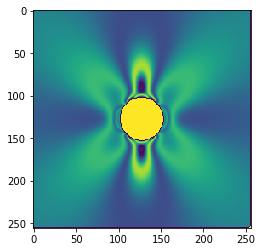

In [29]:
plt.imshow(a5)

In [30]:
for i in range(256):
    for j in range(256):
        value = ((i-128)**2)+((j-128)**2)
        if (value < (26)**2):
            a6[i,j] = 0

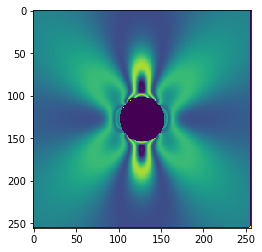

In [31]:
plt.imshow(a6)

In [5]:
def filtro_placa(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            value = ((i-128)**2)+((j-128)**2)
            if (value < (26)**2):
                a1[i,j] = 0   
    return a1

# Viga distribuida

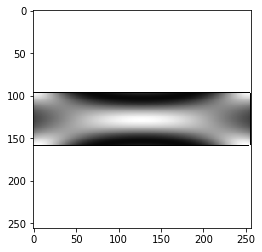

In [33]:
a7 = cv2.imread(m4 + ims + c[3] + 'Img_1/Img1_100.bmp')[:,:,1]
plt.imshow(a7, cmap='gray')

In [34]:
df4 = pd.DataFrame(a7)
#df4.to_excel('a7.xlsx')

In [35]:
a8 = a7.copy()

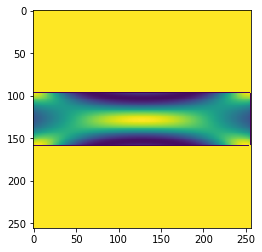

In [36]:
plt.imshow(a7)

In [37]:
for i in range(256):
    for j in range(256):
        if (i < 96 or i > 159):
            a8[i,j] = 0

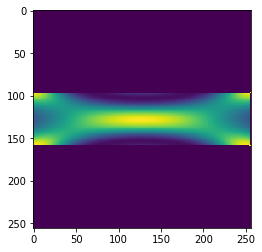

In [38]:
plt.imshow(a8)

# Viga puntual

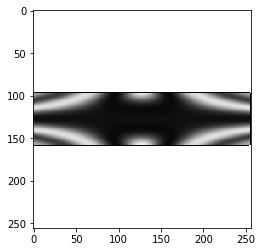

In [39]:
a9 = cv2.imread(m5 + ims + c[3] + 'Img_1/Img1_100.bmp')[:,:,1]
plt.imshow(a9, cmap='gray')

In [40]:
df5 = pd.DataFrame(a9)
#df5.to_excel('a9.xlsx')

In [41]:
a10 = a9.copy()

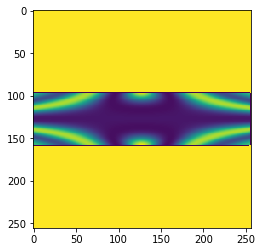

In [42]:
plt.imshow(a9)

In [43]:
for i in range(256):
    for j in range(256):
        if (i < 96 or i > 159):
            a10[i,j] = 0

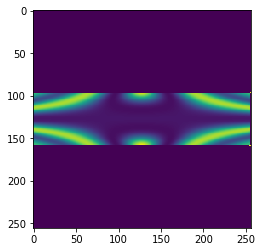

In [44]:
plt.imshow(a10)

In [6]:
def filtro_viga(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            if (i < 96 or i > 159):
                a1[i,j] = 0   
    return a1

# Estructura Vertical

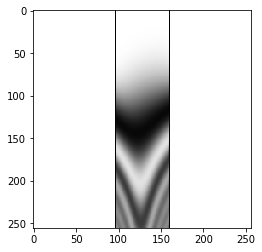

In [5]:
a11 = cv2.imread(m6 + ims + c[0] + 'Img_1/Img1_100.bmp')[:,:,1]
plt.imshow(a11, cmap='gray')

In [6]:
df6 = pd.DataFrame(a11)
#df6.to_excel('a11.xlsx')

In [8]:
a12 = a11.copy()

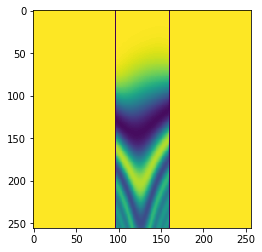

In [9]:
plt.imshow(a11)

In [10]:
for i in range(256):
    for j in range(256):
        if (j < 96 or j > 160):
            a12[i,j] = 0

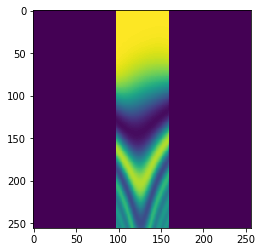

In [11]:
plt.imshow(a12)

In [12]:
def filtro_vertical(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            if (j < 96 or j > 160):
                a1[i,j] = 0   
    return a1

# Ménsula

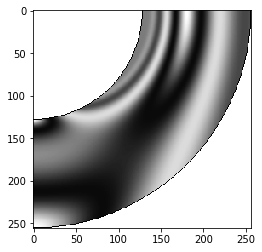

In [29]:
a13 = cv2.imread(m7 + ims + c[0] + 'Img_1/Img1_100.bmp')[:,:,1]
plt.imshow(a13, cmap='gray')

In [30]:
df7 = pd.DataFrame(a13)
#df7.to_excel('a13.xlsx')

In [55]:
a14 = a13.copy()

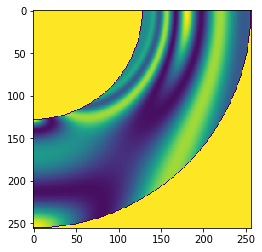

In [56]:
plt.imshow(a14)

In [57]:
for i in range(256):
    for j in range(256):
        value = ((i)**2)+((j)**2)
        if (value >= (256)**2) or (value <= (128)**2):
            a14[i,j] = 0

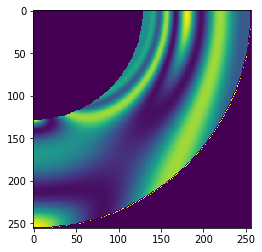

In [58]:
plt.imshow(a14)

In [59]:
def filtro_mensula(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            value = ((i)**2)+((j)**2)
            if (value >= (256)**2) or (value <= (128)**2):
                a14[i,j] = 0
    return a1

# Generación de stacks

In [7]:
def get_filtro(m, url):
    if 'Disco' in m:
        return filtro_disco(url)
    elif 'Anillo' in m:
        return filtro_anillo(url)
    elif 'Placa' in m:
        return filtro_placa(url)
    elif 'Viga' in m:
        return filtro_viga(url)
    """"
    elif 'Estructura' in m:
        return filtro_vertical(url)
    elif 'Mensula' in m:
        return filtro_mensula(url)
    """

### Aplicar filtro a todas las imágenes y generar stacks

In [141]:
for m in mm:                           #Recorrer cada uno de los 5 modelos
    for z in c:                        #Recorrer cada una de las 63 combinaciones de cámara e iluminación para cada modelo
        ## Normalización de la imagen a partir del valor máximo encontrado en el stack de mayor carga
        b1 = get_filtro(m, m + ims + z + i1 + 'Img1_' + '100.bmp')    #Imagen 1
        b2 = get_filtro(m, m + ims + z + i2 + 'Img2_' + '100.bmp')    #Imagen 2
        b3 = get_filtro(m, m + ims + z + i3 + 'Img3_' + '100.bmp')    #Imagen 3
        b4 = get_filtro(m, m + ims + z + i4 + 'Img4_' + '100.bmp')    #Imagen 4
        b5 = np.dstack([b1, b2, b3, b4])
        valor = np.amax(b5)
        
        for n in range(1, 101):        #Recorrer cada una de las 100 imágenes de cada combinación, tomando el canal G del espacio RGB                
            i90 = get_filtro(m, m + ims + z + i1 + 'Img1_' + str(n) + '.bmp')    #Imagen 1
            i45 = get_filtro(m, m + ims + z + i2 + 'Img2_' + str(n) + '.bmp')    #Imagen 2
            i135 = get_filtro(m, m + ims + z + i3 + 'Img3_' + str(n) + '.bmp')    #Imagen 3
            i0 = get_filtro(m, m + ims + z + i4 + 'Img4_' + str(n) + '.bmp')    #Imagen 4
            s0 = 0.5*(i0 + i90 + i45 + i135)
            s1 = i0 - i90
            s2 = i45 - i135
            s = np.dstack([s0, s1, s2])                     # Concatenación por medio de stack
            s = s/valor                                # Normalización por valor máximo
            np.save(m + ims + z + 'Stokes/' + 'Stokes_M' + str(mm.index(m)+1) + '_C' + str(c.index(z)+1) + '_' + str(n) + '.npy', s) #Guardar stack
            
        print(m + z)

Coleccion/Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Willard_IMX250MZR_No_correccion/
Coleccion/Anillo_compresion__Carga_Lineal_3200N__100_frames__256_Resolucion/Willard_IMX250MZR_No_correccion/
Coleccion/Placa_Infinita__Carga_Lineal_7000N__100_frames__256_Resolucion/Willard_IMX250MZR_No_correccion/
Coleccion/Viga_distribuida__Carga_Lineal_3000N__100_frames__256_Resolucion/Willard_IMX250MZR_No_correccion/
Coleccion/Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/Willard_IMX250MZR_No_correccion/


In [14]:
import matplotlib.pyplot as plt
import numpy as np

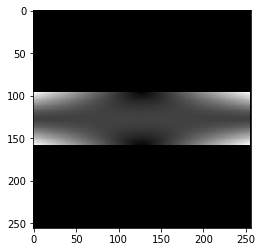

In [36]:
im = np.loadtxt('C:/Users/Diego/Desktop/Tesis/Generador/Coleccion/Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/PNA5/PN_100.txt')
plt.imshow(im, cmap='gray')

In [29]:
im.shape

(256, 256)

In [27]:
ls "C:/Users/Diego/Desktop/Tesis/Generador/Coleccion/Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/PNA1"

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 9287-81E1

 Directorio de C:\Users\Diego\Desktop\Tesis\Generador\Coleccion\Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion\PNA1

06/08/2022  10:23 p. m.    <DIR>          .
06/08/2022  10:23 p. m.    <DIR>          ..
06/07/2022  08:15 p. m.         1.638.656 PN_1.txt
06/07/2022  08:15 p. m.         1.638.656 PN_10.txt
06/07/2022  08:15 p. m.         1.638.656 PN_100.txt
06/07/2022  08:57 p. m.         1.638.656 PN_101.txt
06/07/2022  08:57 p. m.         1.638.656 PN_102.txt
06/07/2022  08:57 p. m.         1.638.656 PN_103.txt
06/07/2022  08:57 p. m.         1.638.656 PN_104.txt
06/07/2022  08:57 p. m.         1.638.656 PN_105.txt
06/07/2022  08:57 p. m.         1.638.656 PN_106.txt
06/07/2022  08:57 p. m.         1.638.656 PN_107.txt
06/07/2022  08:57 p. m.         1.638.656 PN_108.txt
06/07/2022  08:57 p. m.         1.638.656 PN_109.txt
06/07/2022  08:15 p. m.         1.638.656 PN_11.tx

In [206]:
import math
np.seterr(divide='ignore', invalid='ignore')     
for m in mm:                           #Recorrer cada uno de los 5 modelos
    for z in c:                        #Recorrer cada una de las 18 combinaciones de cámara e iluminación para cada modelo
        ## Normalización de la imagen a partir del valor máximo encontrado en el stack de mayor carga
        b1 = get_filtro(m, m + ims + z + i1 + 'Img1_' + '100.bmp')    #Imagen 1
        b2 = get_filtro(m, m + ims + z + i2 + 'Img2_' + '100.bmp')    #Imagen 2
        b3 = get_filtro(m, m + ims + z + i3 + 'Img3_' + '100.bmp')    #Imagen 3
        b4 = get_filtro(m, m + ims + z + i4 + 'Img4_' + '100.bmp')    #Imagen 4
        b5 = np.dstack([b1, b2, b3, b4])
        valor = np.amax(b5)
        
        for n in range(1, 101):        #Recorrer cada una de las 100 imágenes de cada combinación, tomando el canal G del espacio RGB                
            i90 = get_filtro(m, m + ims + z + i1 + 'Img1_' + str(n) + '.bmp')    #Imagen 1
            i45 = get_filtro(m, m + ims + z + i2 + 'Img2_' + str(n) + '.bmp')    #Imagen 2
            i135 = get_filtro(m, m + ims + z + i3 + 'Img3_' + str(n) + '.bmp')    #Imagen 3
            i0 = get_filtro(m, m + ims + z + i4 + 'Img4_' + str(n) + '.bmp')    #Imagen 4
            s0 = i0 + i90
            s1 = i0 - i90
            s2 = i45 - i135
            AoP=(0.5)*(np.arctan(s2/s1))
            DoLP = (np.power((np.power(s1,2)+np.power(s2,2)),0.5))/s0
            s = np.dstack([AoP, DoLP, s0])  # Concatenación por medio de stack
            s = np.nan_to_num(s, nan=0.0, posinf=255, neginf=0.0)                 
            s = s/valor # Normalización por valor máximo
            np.save(m + ims + z + 'StokesHSI/' + 'StokesHSI_M' + str(mm.index(m)+1) + '_C' + str(c.index(z)+1) + '_' + str(n) + '.npy', s) #Guardar stack

In [242]:
m = m3
z = c[1]
n = 100

b1 = get_filtro(m, m + ims + z + i1 + 'Img1_' + '100.bmp')    #Imagen 1
b2 = get_filtro(m, m + ims + z + i2 + 'Img2_' + '100.bmp')    #Imagen 2
b3 = get_filtro(m, m + ims + z + i3 + 'Img3_' + '100.bmp')    #Imagen 3
b4 = get_filtro(m, m + ims + z + i4 + 'Img4_' + '100.bmp')    #Imagen 4
b5 = np.dstack([b1, b2, b3, b4])
valor = np.amax(b5)
     
i90 = get_filtro(m, m + ims + z + i1 + 'Img1_' + str(n) + '.bmp')    #Imagen 1
i45 = get_filtro(m, m + ims + z + i2 + 'Img2_' + str(n) + '.bmp')    #Imagen 2
i135 = get_filtro(m, m + ims + z + i3 + 'Img3_' + str(n) + '.bmp')    #Imagen 3
i0 = get_filtro(m, m + ims + z + i4 + 'Img4_' + str(n) + '.bmp')    #Imagen 4
s0 = i0 + i90
s1 = i0 - i90
s2 = i45 - i135
AoP=(0.5)*(np.arctan(s2/s1))
DoLP = (np.power((np.power(s1,2)+np.power(s2,2)),0.5))/s0
s = np.dstack([AoP, DoLP, s0])                     # Concatenación por medio de stack
s = s/valor

In [125]:
m = m2
z = c[1]
n = 100

b1 = get_filtro(m, m + ims + z + i1 + 'Img1_' + '100.bmp')    #Imagen 1
b2 = get_filtro(m, m + ims + z + i2 + 'Img2_' + '100.bmp')    #Imagen 2
b3 = get_filtro(m, m + ims + z + i3 + 'Img3_' + '100.bmp')    #Imagen 3
b4 = get_filtro(m, m + ims + z + i4 + 'Img4_' + '100.bmp')    #Imagen 4
b5 = np.dstack([b1, b2, b3, b4])
valor = np.amax(b5)
     
i90 = get_filtro(m, m + ims + z + i1 + 'Img1_' + str(n) + '.bmp')    #Imagen 1
i45 = get_filtro(m, m + ims + z + i2 + 'Img2_' + str(n) + '.bmp')    #Imagen 2
i135 = get_filtro(m, m + ims + z + i3 + 'Img3_' + str(n) + '.bmp')    #Imagen 3
i0 = get_filtro(m, m + ims + z + i4 + 'Img4_' + str(n) + '.bmp')    #Imagen 4
s0 = 0.5*(i0 + i90 + i45 + i135)
s1 = i0 - i90
s2 = i45 - i135
AoP=(0.5)*(np.arctan(s2/s1))
DoLP = (np.power((np.power(s1,2)+np.power(s2,2)),0.5))/s0
s = np.dstack([s0, s1, s2]) 
hsl = np.dstack([AoP, s0/np.amax(s0), DoLP])# Concatenación por medio de stack
hsl2 = np.dstack([AoP, DoLP, s0/np.amax(s0)])# Concatenación por medio de stack
s = s/valor

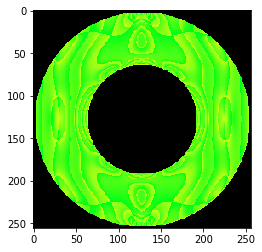

In [126]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
plt.imshow(hsl, cmap = 'gray')

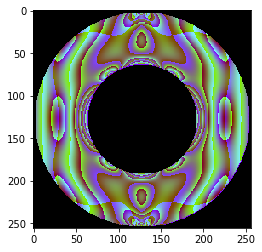

In [127]:
plt.imshow(s, cmap = 'gray')

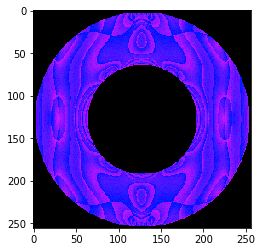

In [128]:
plt.imshow(hsl2, cmap = 'gray')

In [132]:
m = m2
z = c[1]
n = 100

b1 = get_filtro(m, m + ims + z + i1 + 'Img1_' + '100.bmp')    #Imagen 1
b2 = get_filtro(m, m + ims + z + i2 + 'Img2_' + '100.bmp')    #Imagen 2
b3 = get_filtro(m, m + ims + z + i3 + 'Img3_' + '100.bmp')    #Imagen 3
b4 = get_filtro(m, m + ims + z + i4 + 'Img4_' + '100.bmp')    #Imagen 4
b5 = np.dstack([b1, b2, b3, b4])
valor = np.amax(b5)
     
i90 = get_filtro(m, m + ims + z + i1 + 'Img1_' + str(n) + '.bmp')    #Imagen 1
i45 = get_filtro(m, m + ims + z + i2 + 'Img2_' + str(n) + '.bmp')    #Imagen 2
i135 = get_filtro(m, m + ims + z + i3 + 'Img3_' + str(n) + '.bmp')    #Imagen 3
i0 = get_filtro(m, m + ims + z + i4 + 'Img4_' + str(n) + '.bmp')    #Imagen 4
s0 = 0.5*(i0 + i90 + i45 + i135)
s1 = i0 - i90
s2 = i45 - i135
AoP=(0.5)*(np.arctan(s2/s1))
DoLP = (np.power((np.power(s1,2)+np.power(s2,2)),0.5))/s0
s = np.dstack([s0, s1, s2]) 
hsl = np.dstack([AoP, np.zeros((256, 256)), DoLP])# Concatenación por medio de stack
hsl2 = np.dstack([AoP, DoLP, 0.5*(AoP + DoLP)])# Concatenación por medio de stack
s = s/valor

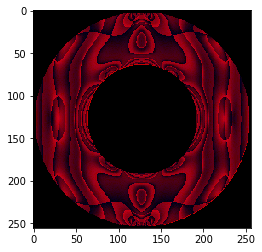

In [133]:
plt.imshow(hsl, cmap = 'gray')

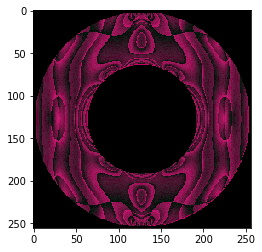

In [134]:
plt.imshow(hsl2, cmap = 'gray')

### Validación de generación correcta de imágenes

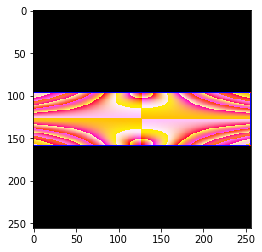

In [221]:
im = np.load(m5 + ims + c[-1] + 'Stokes/' + 'Stokes_M5' + '_C18'  + '_' + str(100) + '.npy')
plt.imshow(im, cmap='gray')

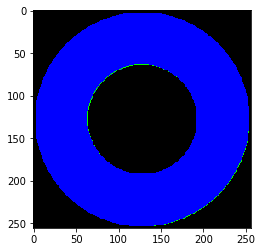

In [135]:
im = np.load(m2 + ims + c[-1] + 'StokesHSI/' + 'StokesHSI_M2' + '_C18'  + '_' + str(100) + '.npy')
plt.imshow(im, cmap='gray')

## Vector Stokes

In [75]:
# i1 -> 90°
# i2 -> 45°
# i3 -> 135°
# i4 -> 0°

i0 = cv2.imread(m2 + ims + c[1] + 'Img_4/Img4_100.bmp')[:,:,1]
i45 = cv2.imread(m2 + ims + c[1] + 'Img_2/Img2_100.bmp')[:,:,1]
i90 = cv2.imread(m2 + ims + c[1] + 'Img_1/Img1_100.bmp')[:,:,1]
i135 = cv2.imread(m2 + ims + c[1] + 'Img_3/Img3_100.bmp')[:,:,1]


In [24]:
m = m1
z = c[1]
n = 100

b1 = get_filtro(m, m + ims + z + i1 + 'Img1_' + '100.bmp')    #Imagen 1
b2 = get_filtro(m, m + ims + z + i2 + 'Img2_' + '100.bmp')    #Imagen 2
b3 = get_filtro(m, m + ims + z + i3 + 'Img3_' + '100.bmp')    #Imagen 3
b4 = get_filtro(m, m + ims + z + i4 + 'Img4_' + '100.bmp')    #Imagen 4
b5 = np.dstack([b1, b2, b3, b4])
valor = np.amax(b5)
     
i90 = get_filtro(m, m + ims + z + i1 + 'Img1_' + str(n) + '.bmp')    #Imagen 1
i45 = get_filtro(m, m + ims + z + i2 + 'Img2_' + str(n) + '.bmp')    #Imagen 2
i135 = get_filtro(m, m + ims + z + i3 + 'Img3_' + str(n) + '.bmp')    #Imagen 3
i0 = get_filtro(m, m + ims + z + i4 + 'Img4_' + str(n) + '.bmp')    #Imagen 4
s0 = 0.5*(i0 + i90 + i45 + i135)
s1 = i0 - i90
s2 = i45 - i135
s = np.dstack([s0, s1, s2])                     # Concatenación por medio de stack
s = s/valor

obj = np.loadtxt(m + 'PNA4/' + 'PN_' + str(100) + '.txt')

Text(0.5,1,'Imagen objetivo')

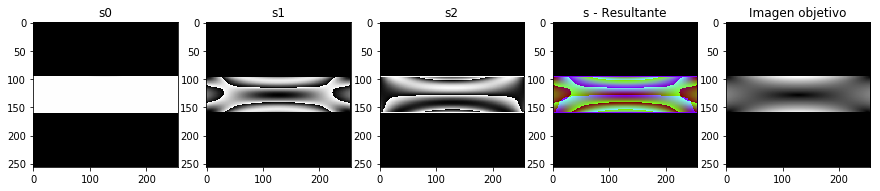

In [25]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15,15))
ax1.imshow(s0, cmap='gray')
ax1.set_title('s0')
ax2.imshow(s1, cmap='gray')
ax2.set_title('s1')
ax3.imshow(s2, cmap='gray')
ax3.set_title('s2')
ax4.imshow(s, cmap='gray')
ax4.set_title('s - Resultante')
ax5.imshow(obj, cmap='gray')
ax5.set_title('Imagen objetivo')

Text(0.5,1,'s - Resultante')

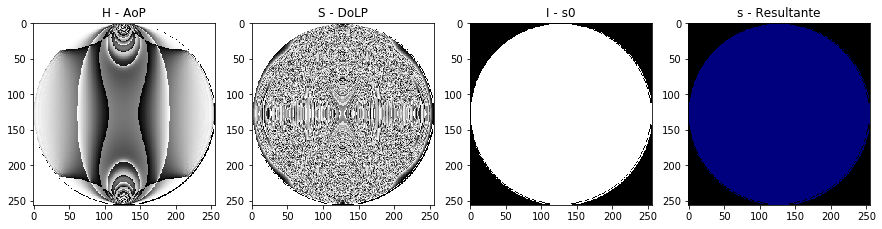

In [254]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,15))
ax1.imshow(AoP, cmap='gray')
ax1.set_title('H - AoP')
ax2.imshow(DoLP, cmap='gray')
ax2.set_title('S - DoLP')
ax3.imshow(s0, cmap='gray')
ax3.set_title('I - s0')
ax4.imshow(s2, cmap='gray')
ax4.set_title('s - Resultante')